# Análise Exploratória
Nesta etapa, os dados de custos de viagem serão analisados estatisticamente mais a fundo, aqui sairão as respostas para as seguintes perguntas relacionadas aos problemas do negócio por meio de insights.

In [1]:
import pandas as pd

df = pd.read_excel('C:/Users/Pedro Fernandes/Desktop/Github/Traveling-Costs-Issue/Data Cleaning/Passagens_Diárias_transf.xlsx')
df.head()

,Orgao_Solicitante,Nome_Solicitante,Numero_PCDP,Solicitacao_Viagem,Inicio_Viagem,Vr_Diaria,Vr_Passagem,Vr_Viagem,Ano,Demora,Temporada
0,ASSESSORIA DE COMUNICAÇÃO INSTITUCIONAL,ADRIANO MEDEIROS DA ROCHA,000223/17,2017-02-10,2017-02-15,330.77,0.00,330.77,2017,5,Alta
1,ASSESSORIA DE COMUNICAÇÃO INSTITUCIONAL,FRANCISCO JOSE DAHER JUNIOR,001051/17,2017-05-17,2017-05-24,186.28,1288.54,1474.82,2017,7,Baixa
2,CENTRO DESPORTIVO,HEBER EUSTAQUIO DE PAULA,000480/17,2017-03-10,2017-03-20,12.49,0.00,12.49,2017,10,Baixa
3,CENTRO DESPORTIVO,HEBER EUSTAQUIO DE PAULA,001040/17,2017-05-17,2017-06-28,125.93,396.32,522.25,2017,42,Baixa
4,GABINETE DO REITOR,ALESSANDRA RODRIGUES KOZOVITS,001265/17,2017-06-12,2017-06-14,101.89,0.00,101.89,2017,2,Baixa


### 1) Sobre os gastos:

#### a) Qual órgão demandou o maior gasto em 2017? Qual o solicitante desse órgão foi o maior responsável pelo gasto?

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

flt17 = df[df.Ano == 2017]
flt17.groupby('Orgao_Solicitante').Vr_Viagem.sum().sort_values()

Orgao_Solicitante
DEPARTAMENTO DE LETRAS                               67.68
PROGRAMA DE APOIO A POS-GRADUAÇÃO EM GEOTECNIA       67.68
COORDENADORIA DE SUPRIMENTOS                        134.97
DEPARTAMENTO DE EDUCAÇÃO                            170.76
DEPARTAMENTO DE HISTÓRIA                            212.40
                                                    ...   
GABINETE DO REITOR                                25768.76
DEPARTAMENTO DE GEOLOGIA                          25955.76
COORDENADORIA DE GESTÃO DE PESSOAS                32358.01
CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA           39874.59
DIVISÃO DE TRANSPORTES                            56922.04
Name: Vr_Viagem, Length: 71, dtype: float64

In [3]:
len(flt17.groupby('Orgao_Solicitante').Vr_Viagem.sum().sort_values())

71

#### Calculando o gasto do Órgão de maior despesa em percentuais

In [4]:
(flt17.groupby('Orgao_Solicitante').Vr_Viagem.sum().sort_values().tail(1).values/flt17.groupby('Orgao_Solicitante').Vr_Viagem.sum().sort_values().sum())*100

array([13.24421127])

Divisão de Trasportes foi responsável pelo maior número de gastos em 2017 com 13,2% dos gastos

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


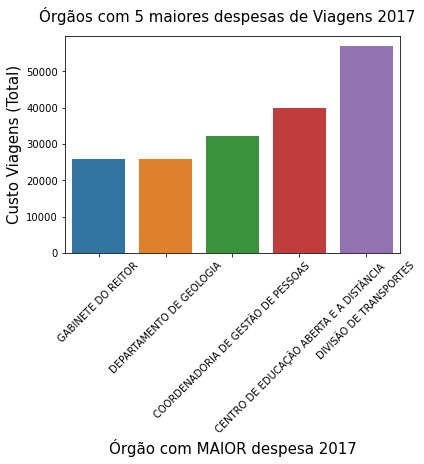

In [5]:
sns.barplot(flt17.groupby('Orgao_Solicitante').Vr_Viagem.sum().sort_values().tail().index,
             y = flt17.groupby('Orgao_Solicitante').Vr_Viagem.sum().sort_values().tail())
plt.xticks(rotation = 45)
plt.xlabel('Órgão com MAIOR despesa 2017', fontsize = 15)
plt.ylabel('Custo Viagens (Total)', fontsize = 15)
plt.suptitle('Órgãos com 5 maiores despesas de Viagens 2017', fontsize = 15)
plt.show()

Gráfico de barras com os Órgãos da Universidade que demandaram maiores despesas com viagens.

#### Funcionário da Divisão de transporte com maiores despesas

In [6]:
flt17_2 = flt17[flt17.Orgao_Solicitante == 'DIVISÃO DE TRANSPORTES']
flt17_2.groupby('Nome_Solicitante').Vr_Viagem.sum().sort_values().tail()

Nome_Solicitante
ROBERTO CARLOS DE CARVALHO    6549.00
ADILSON RAIMUNDO XAVIER       6977.22
JOSE RAIMUNDO TIMOTEO         7125.00
EDSON CLAUDIO GUALBERTO       7418.24
MARCIO FLAVIO MOL             7561.20
Name: Vr_Viagem, dtype: float64

In [7]:
flt17_2.groupby('Nome_Solicitante').Vr_Viagem.sum().sort_values()

Nome_Solicitante
DOMINGOS DIRCEU CESAR           88.50
GERALDO LADISLAU FERREIRA       88.50
GERALDO BERALDO MOREIRA        256.14
ANTONIO RAIMUNDO OVIDIO       4241.48
JOSE MILTON NATIVIDADE        5270.64
JOSE ROBERTO ALVES            5479.92
JOSE OSVALDO DA SILVA         5866.20
ROBERTO CARLOS DE CARVALHO    6549.00
ADILSON RAIMUNDO XAVIER       6977.22
JOSE RAIMUNDO TIMOTEO         7125.00
EDSON CLAUDIO GUALBERTO       7418.24
MARCIO FLAVIO MOL             7561.20
Name: Vr_Viagem, dtype: float64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


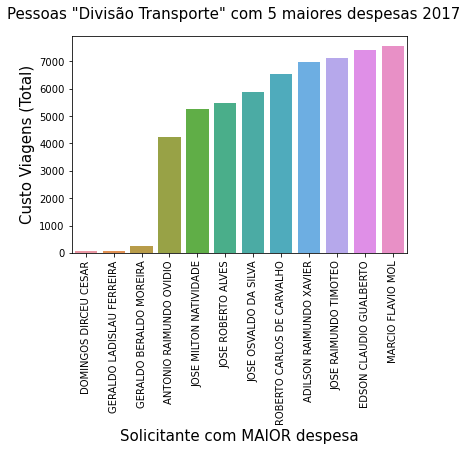

In [8]:
sns.barplot(flt17_2.groupby('Nome_Solicitante').Vr_Viagem.sum().sort_values().index,
           y = flt17_2.groupby('Nome_Solicitante').Vr_Viagem.sum().sort_values())
plt.xticks(rotation=90)
plt.xlabel('Solicitante com MAIOR despesa', fontsize = 15)
plt.ylabel('Custo Viagens (Total)', fontsize = 15)
plt.suptitle('Pessoas "Divisão Transporte" com 5 maiores despesas 2017', 
            fontsize = 15)
plt.show()

O órgão com maior despesa em viagens no ano de 2017 foi o setor de Divisão de Transportes com 56.922,04 reais e neste setor, o funcionário com maior despesa foi o Sr. Marcio Flavio Mol com R$7.561,20 reais

#### b) E em 2018?

#### Órgão responsável

In [9]:
flt18 = df[df.Ano == 2018] # Separa apenas os dados de 2018
flt18.groupby('Orgao_Solicitante').Vr_Viagem.sum().sort_values() # bAgrupa órgãos solicitantes com as somas dos valores

Orgao_Solicitante
ESCOLA DE MEDICINA                                          11910.64
ESCOLA DE NUTRIÇÃO                                          14746.67
ESCOLA DE DIREITO, TURISMO E MUSEOLOGIA                     20115.10
INSTITUTO DE CIÊNCIAS HUMANAS E SOCIAIS                     20135.26
INSTITUTO DE FILOSOFIA, ARTES E CULTURA                     21793.48
INSTITUTO DE CIÊNCIAS EXATAS E APLICADAS JOÃO MONLEVADE     24829.16
ESCOLA DE FARMÁCIA                                          26462.90
INSTITUTO DE CIÊNCIAS SOCIAIS MARIANA - CAMPUS II           29688.73
INSTITUTO DE CIÊNCIAS EXATAS E BIOLÓGICAS                   48428.35
CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA                     53969.69
ESCOLA DE MINAS                                             97072.28
REITORIA                                                   700378.30
Name: Vr_Viagem, dtype: float64

#### Calculando o gasto do Órgão de maior despesa em percentuais

In [10]:
(flt18.groupby('Orgao_Solicitante').Vr_Viagem.sum().sort_values().tail(1).values/flt18.groupby('Orgao_Solicitante').Vr_Viagem.sum().sort_values().sum())*100

array([65.4846459])

Reitoria foi responsável pelo maior número de gastos em 2018 com 65,5% dos gastos

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


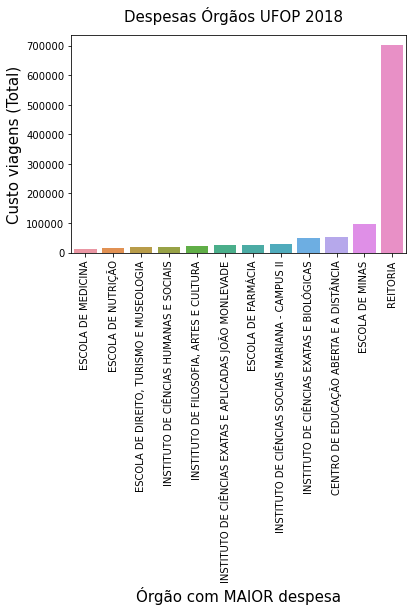

In [11]:
sns.barplot(flt18.groupby('Orgao_Solicitante').Vr_Viagem.sum().sort_values().index,
           y = flt18.groupby('Orgao_Solicitante').Vr_Viagem.sum().sort_values().values)
plt.xticks(rotation = 90)
plt.xlabel('Órgão com MAIOR despesa', fontsize = 15)
plt.ylabel('Custo viagens (Total)', fontsize = 15)
plt.suptitle('Despesas Órgãos UFOP 2018', fontsize = 15)
plt.show()

#### Calculando funcionário com maior despesa da Reitoria

In [12]:
# Dos dados de 2018 filtrados faz-se outro filtro apenas para a REITORIA como órgão solicitante
flt18_2 = flt18[flt18.Orgao_Solicitante == 'REITORIA']
flt18_2.groupby('Nome_Solicitante').Vr_Viagem.sum().sort_values()

Nome_Solicitante
PAULO EDUARDO PINTO VIANA                52.42
VALTER GREGORIO DONATO                   52.86
PATRICIA DA SILVA RODRIGUES              53.93
LUCIA JOANA DARC SIMPLICIO               54.19
PAULO SERGIO DE OLIVEIRA                 54.58
                                        ...   
ROBERTO CARLOS DE CARVALHO            17983.20
ANDERSON ANTONIO GAMARANO             18012.37
EDSON CLAUDIO GUALBERTO               18429.30
SERGIO FRANCISCO DE AQUINO            20987.41
CLAUDIA APARECIDA MARLIERE DE LIMA    54520.53
Name: Vr_Viagem, Length: 458, dtype: float64

#### Calculando a despesa em percentual deste funcionário

In [13]:
(flt18_2.groupby('Nome_Solicitante').Vr_Viagem.sum().sort_values().tail(1)/flt18_2.groupby('Nome_Solicitante').Vr_Viagem.sum().sort_values().sum())*100

Nome_Solicitante
CLAUDIA APARECIDA MARLIERE DE LIMA    7.78444
Name: Vr_Viagem, dtype: float64

O funcionário responsável pela maior parte das despesas é CLAUDIA APARECIDA MARLIERE DE LIMA com 7,8% das despesas do setor

#### c) E em 2019?

#### Identificando órgão responsável pela maior despesa

In [14]:
flt19 = df[df.Ano == 2019]
flt19.groupby('Orgao_Solicitante').Vr_Viagem.sum().sort_values()

Orgao_Solicitante
INSTITUTO DE CIÊNCIAS SOCIAIS MARIANA - CAMPUS II             155.32
INSTITUTO DE FILOSOFIA, ARTES E CULTURA                      3300.49
ESCOLA DE DIREITO, TURISMO E MUSEOLOGIA                      4590.70
INSTITUTO DE CIÊNCIAS HUMANAS E SOCIAIS                      5395.60
ESCOLA DE MEDICINA                                           9943.06
ESCOLA DE FARMÁCIA                                          11528.25
INSTITUTO DE CIÊNCIAS EXATAS E BIOLÓGICAS                   12761.84
INSTITUTO DE CIÊNCIAS EXATAS E APLICADAS JOÃO MONLEVADE     13985.89
CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA                     20646.03
ESCOLA DE NUTRIÇÃO                                          25433.82
ESCOLA DE MINAS                                             74351.77
REITORIA                                                   577067.98
Name: Vr_Viagem, dtype: float64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


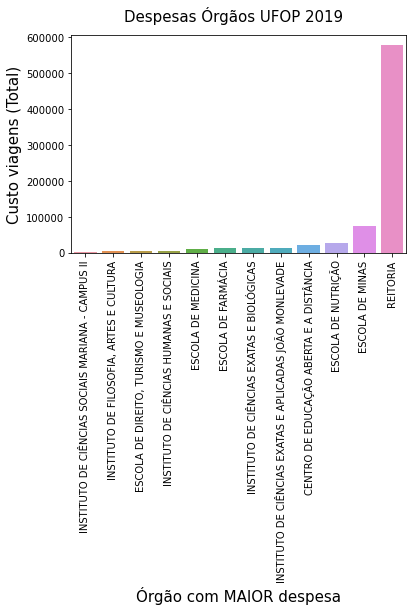

In [15]:
sns.barplot(flt19.groupby('Orgao_Solicitante').Vr_Viagem.sum().sort_values().index,
           y = flt19.groupby('Orgao_Solicitante').Vr_Viagem.sum().sort_values().values)
plt.xticks(rotation = 90)
plt.xlabel('Órgão com MAIOR despesa', fontsize = 15)
plt.ylabel('Custo viagens (Total)', fontsize = 15)
plt.suptitle('Despesas Órgãos UFOP 2019', fontsize = 15)
plt.show()

Identeificando as despesas do setor em percentuais

In [25]:
flt19.groupby('Orgao_Solicitante').Vr_Viagem.sum().sort_values().tail(1)/flt19.groupby('Orgao_Solicitante').Vr_Viagem.sum().sort_values().sum()

Orgao_Solicitante
REITORIA    0.760139
Name: Vr_Viagem, dtype: float64

A REITORIA foi responsável por 76,0% dos gastos neste ano

#### Identificando funcionário responsável pela maior despesa da Reitoria

In [16]:
flt19_2 = flt19[flt19.Orgao_Solicitante == 'REITORIA']
flt19_2.groupby('Nome_Solicitante').Vr_Viagem.sum().sort_values()

Nome_Solicitante
LUCIANO DIAS ASSUNCAO COUTINHO           36.33
FLAVIA SOUZA MAXIMO PEREIRA              43.81
ELIZANGELA DE FATIMA RODRIGUES           49.09
GERALDO PENA DE OLIVEIRA                 58.22
LUCIA JOANA DARC SIMPLICIO               58.46
                                        ...   
JOSE RAIMUNDO TIMOTEO                 15057.96
NITIS MUKHOPADHYAY                    15088.39
ROBERTO CARLOS DE CARVALHO            15752.46
EDSON CLAUDIO GUALBERTO               18457.10
CLAUDIA APARECIDA MARLIERE DE LIMA    30200.63
Name: Vr_Viagem, Length: 436, dtype: float64

#### Calculando a despesa em percentual deste funcionário

In [17]:
(flt19_2.groupby('Nome_Solicitante').Vr_Viagem.sum().sort_values().tail(1)/flt19_2.groupby('Nome_Solicitante').Vr_Viagem.sum().sort_values().sum())*100

Nome_Solicitante
CLAUDIA APARECIDA MARLIERE DE LIMA    5.233461
Name: Vr_Viagem, dtype: float64

O funcionário responsável pela maior parte das despesas é CLAUDIA APARECIDA MARLIERE DE LIMA com 5,2% das despesas do setor

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


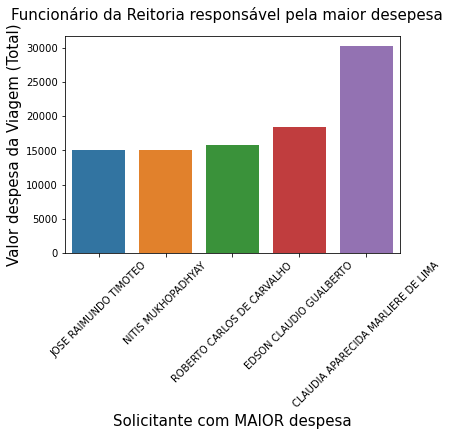

In [18]:
sns.barplot(flt19_2.groupby('Nome_Solicitante').Vr_Viagem.sum().sort_values().tail().index,
           y = flt19_2.groupby('Nome_Solicitante').Vr_Viagem.sum().sort_values().tail().values)
plt.xticks(rotation = 45)
plt.xlabel('Solicitante com MAIOR despesa', fontsize = 15)
plt.ylabel('Valor despesa da Viagem (Total)', fontsize = 15)
plt.suptitle('Funcionário da Reitoria responsável pela maior desepesa', fontsize = 15)
plt.show()

#### d) Gasto total nos três anos? 

#### Identificando orgão responsável pela maior parte dos gastos

In [29]:
df.groupby('Orgao_Solicitante').Vr_Viagem.sum().sort_values()

Orgao_Solicitante
PROGRAMA DE APOIO A POS-GRADUAÇÃO EM GEOTECNIA         67.68
DEPARTAMENTO DE LETRAS                                 67.68
COORDENADORIA DE SUPRIMENTOS                          134.97
DEPARTAMENTO DE EDUCAÇÃO                              170.76
DEPARTAMENTO DE HISTÓRIA                              212.40
                                                     ...    
DIVISÃO DE TRANSPORTES                              56922.04
INSTITUTO DE CIÊNCIAS EXATAS E BIOLÓGICAS           61190.19
CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA            114490.31
ESCOLA DE MINAS                                    171424.05
REITORIA                                          1278300.54
Name: Vr_Viagem, Length: 76, dtype: float64

In [30]:
df.groupby('Orgao_Solicitante').Vr_Viagem.sum().sort_values().tail(1)

Orgao_Solicitante
REITORIA    1278300.54
Name: Vr_Viagem, dtype: float64

Orgão responsável pela maior parte das despesas foi a REITORIA com R$1.278.300,54

#### Identificando gastos deste setor em percentuais

In [35]:
df.groupby('Orgao_Solicitante').Vr_Viagem.sum().sort_values().tail(1)/df.groupby('Orgao_Solicitante').Vr_Viagem.sum().sort_values().sum()

Orgao_Solicitante
REITORIA    0.566001
Name: Vr_Viagem, dtype: float64

Durante os anos 2017, 2018 e 2019 a REITORIA foi responsável por 56,6% das despesas de viagens

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


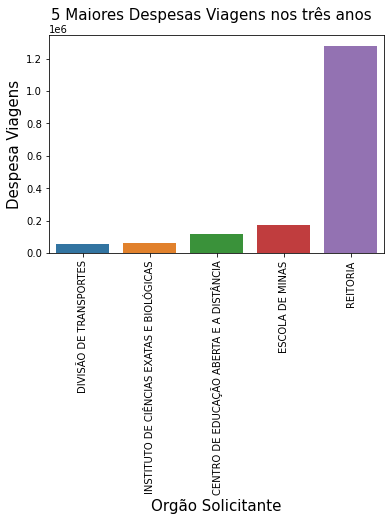

In [57]:
sns.barplot(df.groupby('Orgao_Solicitante').Vr_Viagem.sum().sort_values().tail(5).index,
           df.groupby('Orgao_Solicitante').Vr_Viagem.sum().sort_values().tail(5).values)
plt.xticks(rotation = 90)
plt.xlabel('Orgão Solicitante', fontsize = 15)
plt.ylabel('Despesa Viagens', fontsize = 15)
plt.suptitle('5 Maiores Despesas Viagens nos três anos', fontsize = 15)
plt.show()

#### Identificando despesas dos funcionários da Reitoria

In [46]:
fltTot_2 = df[df.Orgao_Solicitante == 'REITORIA']
fltTot_2.groupby('Nome_Solicitante').Vr_Viagem.sum().sort_values()

Nome_Solicitante
FLAVIA SOUZA MAXIMO PEREIRA              43.81
ELIZANGELA DE FATIMA RODRIGUES           49.09
VALTER GREGORIO DONATO                   52.86
PAULO SERGIO DE OLIVEIRA                 54.58
GERALDO PENA DE OLIVEIRA                 58.22
                                        ...   
MARCIO FLAVIO MOL                     30523.64
JOSE RAIMUNDO TIMOTEO                 32456.18
ROBERTO CARLOS DE CARVALHO            33735.66
EDSON CLAUDIO GUALBERTO               36886.40
CLAUDIA APARECIDA MARLIERE DE LIMA    84721.16
Name: Vr_Viagem, Length: 769, dtype: float64

Funcionário com maior despesa do setor é CLAUDIA APARECIDA MARLIERE DE LIMA com R$84.721,16

#### Gastos deste funcionário em percentuais

#### PERCENTUAL DE TODOS OS FUNCIONÁRIOS DO SETOR, CLÁUDIA NO FINAL

In [51]:
(fltTot_2.groupby('Nome_Solicitante').Vr_Viagem.sum().sort_values()/fltTot_2.groupby('Nome_Solicitante').Vr_Viagem.sum().sort_values().sum())*100

Nome_Solicitante
FLAVIA SOUZA MAXIMO PEREIRA           0.003427
ELIZANGELA DE FATIMA RODRIGUES        0.003840
VALTER GREGORIO DONATO                0.004135
PAULO SERGIO DE OLIVEIRA              0.004270
GERALDO PENA DE OLIVEIRA              0.004554
                                        ...   
MARCIO FLAVIO MOL                     2.387830
JOSE RAIMUNDO TIMOTEO                 2.539010
ROBERTO CARLOS DE CARVALHO            2.639102
EDSON CLAUDIO GUALBERTO               2.885581
CLAUDIA APARECIDA MARLIERE DE LIMA    6.627640
Name: Vr_Viagem, Length: 769, dtype: float64

CLAUDIA APARECIDA MARLIERE DE LIMA é responsável por 6,62%

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


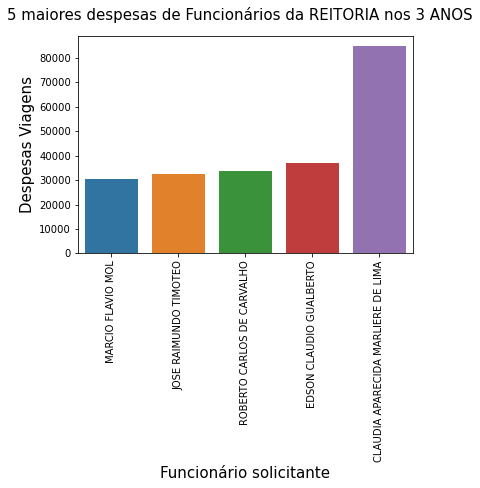

In [62]:
sns.barplot(fltTot_2.groupby('Nome_Solicitante').Vr_Viagem.sum().sort_values().tail(5).index,
           fltTot_2.groupby('Nome_Solicitante').Vr_Viagem.sum().sort_values().tail(5).values)
plt.xticks(rotation = 90)
plt.xlabel('Funcionário solicitante', fontsize = 15)
plt.ylabel('Despesas Viagens', fontsize = 15)
plt.suptitle('5 maiores despesas de Funcionários da REITORIA nos 3 ANOS', fontsize = 15)
plt.show()

Com exceção do primeiro ano (2017) a maior demanda de despesas com viagens veio da Reitoria, no entanto, há uma outra hipótese que é o fato de nem todos os solicitantes serem exatamente do núcleo da reitoria, mas sim de Pró-Reitorias de diversos outros setores da Universidade que está sendo enquadrada na tabela como da Reitoria, principalmente por conta de alguns nomes de profissionais nos quais tenho um breve conhecimento de onde pertencem. Além da importância em apenas levantar qual o maior setor demanda despesas com viagens, este levantamento pode ser interessante para aconselhar o setor de dados da PROPLAD a melhorar sua coleta detalhando e refinando ainda mais a descrição dos dados, como por exemplo identificar quais setores dentro da reitoria que demandam tais custos. No total dos três anos (2017, 2018 e 2019) a Reitoria liderou as despesas com 56,6% e a Reitora Cláudia com 6,62% das despesas.

### 2) Qual o tipo mais solicitado, diárias ou passagens? Qual dos dois demandou os maiores gastos e quanto?

### 3) Fazer uma análise de boxplot para cada ano e para o total de solicitações:

#### a) Analisar e fazer uma comparação dos outliers de cada ano e discorrer sobre.

#### b) Analisar os limites inferiores e superiores discorrer sobre.

#### c) Analisar as assimetrias discorrer sobre.

#### d) Comparar o comportamento destes parâmetros dos anos individuais com os parâmetros do gráfico do total (Valor Viagem) discorrer sobre. 

### 4) Qual o desvio padrão para cada ano? Comparar os desvios padrão de cada entre si e entre o total.

### 5) Há correlação entre os dados? Quais são as correlações?

### 6) Fazer uma análise de Time Series.

### 7) Fazer uma previsão de futuras demandas usando ARIMA, para 2020, 2021, 2022 e 2023? 

### 8) Há relação de Pareto entre os dados? Fazer um gráfico de Pareto e analisar.